# Hot Plasma II. Sandbox

Play around with some figures for Paper II

In [2]:
import sys
import os
from random import randint
from imp import reload
import pickle
import xml.etree.ElementTree as ET
import pandas as pd
from astroML import density_estimation
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import colorbar
from matplotlib.ticker import NullFormatter
import seaborn.apionly as sns
plt.style.use('papers')
sys.path.append(os.path.join(os.environ['RESEARCH_DIR'],'EBTEL_analysis/src/'))
import ebtel_dem as ebd
import ebtel_plot_em as ebpe
reload(ebd)
reload(ebpe)
%matplotlib inline

/opt/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/opt/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Time-averaged density for all $t_N$: comparing uniform and power-law cases

Uniform heating cases affected by NEI, power-law cases not so much. Why? Greater average density? Look at distributions for all $t_N$.

In [5]:
#set up paths, static options
alpha=2.5
species='electron'
twait=np.arange(250,5250,250)
root = '/data/datadrive2/EBTEL_runs/%s_heating_runs/alpha%s/data/ebtel_L40.0_tn%d%s_tpulse200.0_rka4/'

In [6]:
#load data
avg_densities = []
for tw in twait:
    tmp_dict = {}
    #uniform
    n_avg = []
    for f in os.listdir(root%(species,'uniform',tw,'')):
        if 'heat_amp' not in f and 'dem' not in f:
            data = np.loadtxt(os.path.join(root%(species,'uniform',tw,''),f))
            n_avg.append(np.average(data[:,3],weights=np.gradient(data[:,0])))
    tmp_dict['uniform'] = n_avg
    #power-law
    n_avg = []
    for f in os.listdir(root%(species,'2.5',tw,'')):
        if 'heat_amp' not in f and 'dem' not in f:
            data = np.loadtxt(os.path.join(root%(species,'2.5',tw,''),f))
            n_avg.append(np.average(data[:,3],weights=np.gradient(data[:,0])))
    tmp_dict['pl'] = n_avg
    #power-law with scaling
    n_avg = []
    for f in os.listdir(root%(species,'2.5',tw,'-b1.0')):
        if 'heat_amp' not in f and 'dem' not in f:
            data = np.loadtxt(os.path.join(root%(species,'2.5',tw,'-b1.0'),f))
            n_avg.append(np.average(data[:,3],weights=np.gradient(data[:,0])))
    tmp_dict['pl_beta'] = n_avg
    #append to main list
    avg_densities.append(tmp_dict)

In [8]:
#save density results to pickle file to avoid having to import them all again
with open('avg_densities.pickle','wb') as f:
    pickle.dump(avg_densities,f)

Now, make a histogram of all of them.

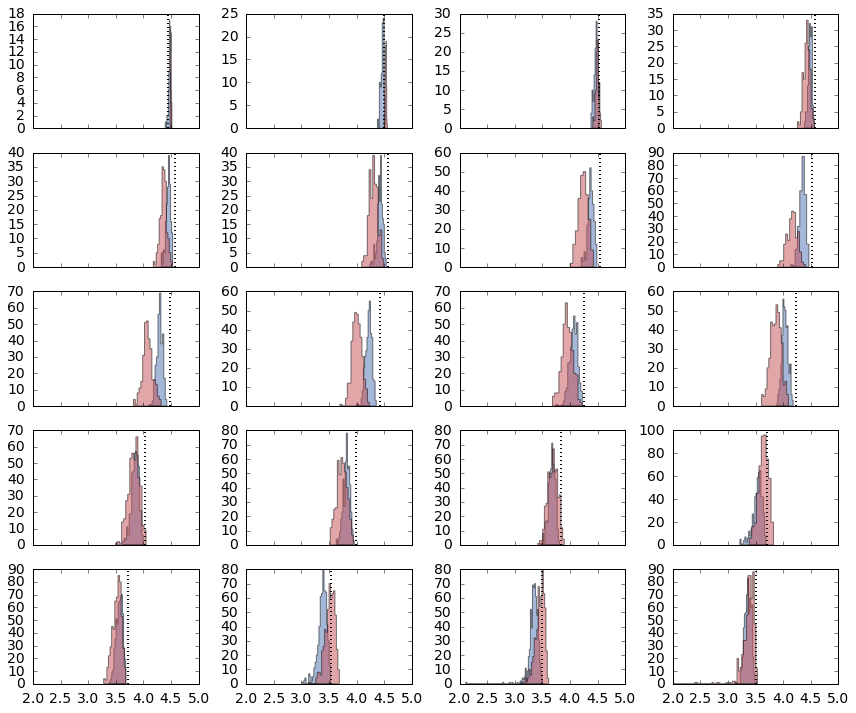

In [22]:
figure,axes = plt.subplots(5,4,figsize=(12,10),sharex=True,)#sharey=True)
for ax,tw,i in zip(axes.flatten(),twait,range(len(avg_densities))):
    #uniform
    ax.axvline(x=avg_densities[i]['uniform'][0]/1e+9,linestyle='dotted',linewidth=2,color='k')
    #power-law
    _,bins=density_estimation.knuth_bin_width(np.array(avg_densities[i]['pl'])/1e+9,return_bins=True,disp=False)
    ax.hist(np.array(avg_densities[i]['pl'])/1e+9,bins=bins,color=sns.color_palette('deep')[0],histtype='stepfilled',alpha=0.5)
    #power-law+beta
    _,bins=density_estimation.knuth_bin_width(np.array(avg_densities[i]['pl_beta'])/1e+9,return_bins=True,disp=False)
    ax.hist(np.array(avg_densities[i]['pl_beta'])/1e+9,bins=bins,color=sns.color_palette('deep')[2],histtype='stepfilled',alpha=0.5)
    #lims,labels
    ax.set_xlim([2.0,5.0])
plt.tight_layout()
plt.show()